# Como instalar paquetes en jupyter (y collab)?
Simplemente debemos instalarlos como lo hariamos con la terminal. Copiar el comando pip. Por eso no te servia el código

In [1]:
 pip install wordcloud

In [2]:
pip install emoji

# ¿Qué es Pandas?
Es una librería que utilizaremos para hacer el modulo de "Transform" de los datos. Para esto vamos a ver sus estructuras de datos

## Series
Las series son arreglos que utilizan indices o etiquetas para accceder a la información.

In [3]:
import pandas as pd
import re

#la convencion es utilizar pd

series_test = pd.Series([100,200,300])
series_test

0    100
1    200
2    300
dtype: int64

In [4]:
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from googletrans import Translator, constants
import regex

Como vemos, los datos que guarda una serie es indice (izq), valor (derecha) y en la parte final el tipo de datos. Ahora vamos a crear una Series con un diccionario

In [5]:
series_test2 = pd.Series({1999:48,
                         2000:65,
                         2001:89})
series_test2

1999    48
2000    65
2001    89
dtype: int64

## DataFrame
Es una estructura de datos que permite crear matrices de información. Su principal caracteristica es poderle dar etiquetas a las filas y columnas

In [6]:
frame_test = pd.DataFrame({
    1999:[74,38,0],
    2000:[0,39,12],
    2001:[99,21,9]
})
frame_test

,1999,2000,2001
0,74,0,99
1,38,39,21
2,0,12,9


Ahora, también tenemos la opción de poder nombrar las columnas con labels, dandole como argumento una lista. En este caso **la lista de origen** se pone dentro de una lista

In [7]:
frame_test = pd.DataFrame(
    [[74,38,0],
    [0,39,12],
    [99,21,9]],
    columns = [1999,2000,2001])
    
frame_test

,1999,2000,2001
0,74,38,0
1,0,39,12
2,99,21,9


También podemos marcar las etiquetas de las filas de la siguiente forma (con un diccionario):

In [8]:
frame_test = pd.DataFrame(
    [[74,38,0],
    [0,39,12],
    [99,21,9]],
    columns = [1999,2000,2001],
    index=['ganancia','perdida','balance'])
    
frame_test

,1999,2000,2001
ganancia,74,38,0
perdida,0,39,12
balance,99,21,9


# Indices y selección
¿Cómo acceder a alguna parte del dataframe?
Se presentan 3 diferentes formas, **como diccionario**,  **por indices**, o por **etiquetas** (como miembro, fecha, etc)
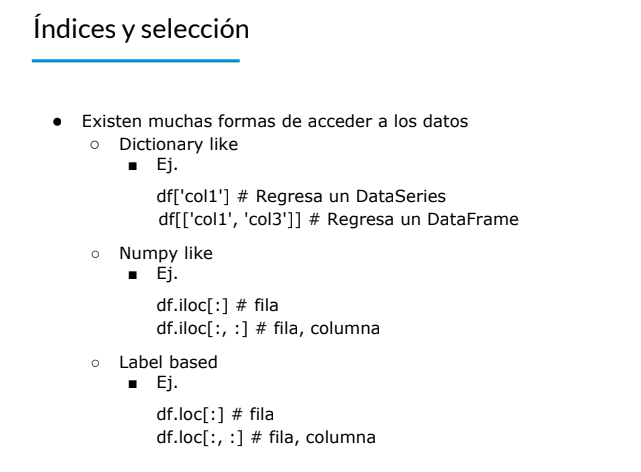

iloc recibe como parametros numeros  

loc puede recibir numeros o el dato con el que hayamos nombrado la columna

In [25]:
df.loc[0]

Fecha                                    2022-10-14 00:00:00
Hora                                                  20:37 
Miembro                                          Juan Cortes
Mensaje    Holi, oye una pregunta a ti te ha llegado algo...
Emojis                                                    []
URLs                                                       0
Name: 0, dtype: object

In [26]:
df.loc[9]['Miembro']

' Mary❤️'

In [27]:
df.loc[0:2,'Fecha']

0   2022-10-14
1   2022-10-14
2   2022-10-14
Name: Fecha, dtype: datetime64[ns]

In [28]:
df.iloc[0:10,2:4]

,Miembro,Mensaje
0,Juan Cortes,"Holi, oye una pregunta a ti te ha llegado algo..."
1,Mary❤️,"Nop, te iba a preguntar lo mismo"
2,Mary❤️,<Médias omis>
3,Juan Cortes,JAJAJAJA
4,Juan Cortes,Me da cosa que por ahí lleguemos y no haya nada😑
5,Mary❤️,"Jajajajajaja no no creo, pero si que nos digan..."
6,Juan Cortes,<Médias omis>
7,Juan Cortes,Jajajaj no imposible
8,Juan Cortes,Tendrían mucho genio
9,Mary❤️,Cierto estamos como muy paranoicos jajajajajaja


## Detectamos la existencia de fecha y hora de los mensajes por medio de expresiones regulares

En este artículo encontramos más documentación sobre las expresiones regulares
https://developers.google.com/edu/python/regular-expressions

In [10]:
def IniciaConFechaYHora(s):
    ##ejemplo: 14/10/2022, 20:37 - 
    patron = '^(0[1-9]|1[0-9]|2[0-9]|3[0-1])(/)(0[1-9]|1[0-2])(/)(2[0-9][0-9][0-9])(, )(0[0-9]|1[0-9]|2[0-3]):([0-5][0-9]) -' # (a.\xa0m./p.\xa0m.)
    resultado = re.match(patron,s) #verifica que cada linea del txt hace match con la fecha y hora
    if resultado:
        return True
    return False

### Encontrar los miembros de la conversación

In [11]:
def encontrarMiembro(s):
    patrones = ['([\w]+[\s]*)[\u263a-\U0001f999]+:' #nombre + emoji
                ,'([\w]+[\s]*[\w]+):' #nombre + apellido
               ]
    patron = '^' + '|'.join(patrones)
    resultado = re.match(patron,s) #verifica que cada linea del txt hace match con la fecha y hora
    if resultado:
        return True
    return False

## Obtener la fecha, hora, miembro y mensaje

In [12]:
def ObtenerPartes(linea):
    #ejemplo 14/10/2022, 20:37 - Juan Cortes: Holi, oye una pregunta a ti te ha llegado algo del taller de mañana?
    splitLinea = linea.split('-')
    FechaHora = splitLinea[0] # 14/10/2022, 20:37
    #split separa en una lista de acuerdo a un argumento. En este caso es el -
    splitFechaHora = FechaHora.split(',') 
    Fecha = splitFechaHora[0] #14/10/2022
    Hora = ' '.join(splitFechaHora[1:]) # 20:37
    Mensaje = ' '.join(splitLinea[1:])  # Juan Cortes: Holi, oye una pregunta a ti te ha llegado algo del taller de mañana?
    splitMensaje = Mensaje.split(': ') 
    Miembro = splitMensaje[0] #Juan Cortes
    Mensaje = ' '.join(splitMensaje[1:]) #Unimos todo para tener completamente el mensaje 
    #Holi, oye una pregunta a ti te ha llegado algo del taller de mañana?
    """"
    if encontrarMiembro(Mensaje):
        splitMensaje = Mensaje.split(': ') 
        Miembro = splitMensaje[0] #Juan Cortes
        Mensaje = ' '.join(splitMensaje[1:]) #Unimos todo para tener completamente el mensaje 
        #Holi, oye una pregunta a ti te ha llegado algo del taller de mañana?
    else:
        Miembro = None
    """
    return Fecha, Hora, Miembro, Mensaje
    

## Ahora utilizaremos las funciones para crear el dataFrame de nuestro chat

In [13]:
# Leer el archivo txt descargado del chat de WhatsApp
RutaChat = './Discussion.txt'
translator = Translator()
# Lista para almacenar los datos (Fecha, Hora, Miembro, Mensaje) de cada línea del txt 
DatosLista = [] 
with open(RutaChat, encoding="utf-8") as fp:
    fp.readline() # Eliminar primera fila relacionada al cifrado de extremo a extremo
    VerificarMensaje = [] # Lista para verificar que no existan mensajes vacíos 
    Fecha, Hora, Miembro = None, None, None
   
    while True:
        linea = fp.readline() 
        #caso base
        if not linea: 
            break
        linea = linea.strip() 
    
        if IniciaConFechaYHora(linea): # Si cada línea del txt coincide con el patrón fecha y hora
            if len(VerificarMensaje) > 0: 
                # Añadir un elemento lista que contendrá los datos a la lista 'DatosLista' 
                DatosLista.append([Fecha, Hora, Miembro, ' '.join(VerificarMensaje)]) 
           
            VerificarMensaje.clear() 
            Fecha, Hora, Miembro, Mensaje = ObtenerPartes(linea) # Obtener datos de cada línea del txt
            
            VerificarMensaje.append(Mensaje) 
        else:
            VerificarMensaje.append(linea)

    print(DatosLista[4])

# Convertir la lista con los datos a dataframe
df = pd.DataFrame(DatosLista, columns=['Fecha', 'Hora', 'Miembro', 'Mensaje']) 

# Cambiar la columna Fecha a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format="%d/%m/%Y")

# Eliminar los posibles campos vacíos del dataframe
# y lo que no son mensajes como cambiar el asunto del grupo o agregar a alguien
df = df.dropna()
#drop na borra filas vacias
# Rester el índice
df.reset_index(drop=True, inplace=True)
df



['14/10/2022', ' 20:42 ', ' Juan Cortes', 'Me da cosa que por ahí lleguemos y no haya nada😑']


,Fecha,Hora,Miembro,Mensaje
0,2022-10-14,20:37,Juan Cortes,"Holi, oye una pregunta a ti te ha llegado algo..."
1,2022-10-14,20:41,Mary❤️,"Nop, te iba a preguntar lo mismo"
2,2022-10-14,20:41,Mary❤️,<Médias omis>
3,2022-10-14,20:42,Juan Cortes,JAJAJAJA
4,2022-10-14,20:42,Juan Cortes,Me da cosa que por ahí lleguemos y no haya nada😑
...,...,...,...,...
34491,2023-02-19,22:42,Mary❤️,Que duermas
34492,2023-02-19,22:42,Mary❤️,❤️❤️
34493,2023-02-19,22:49,Juan Cortes,Jajajaj
34494,2023-02-19,22:49,Juan Cortes,Bueno amor que descanses lo que no descansaste...


# Estadísticas y análisis 
Miembros más activos inicialmente

### ¿Cuál era el problema para que el dataframe no tomara los datos?
El problema estaba en 2 partes. Inicialmente el regex que identifica el miembro no funcionaba bien. Por ende en la funcion **obtenerPartes** no estaba tomando el miembro y como habia un none dentro del dataframe no lo estaba construyendo.

### ¿Cómo se solucionó?
Quitando el if, asumiendo el riesgo de no identificar el miembro del mensaje. Por el momento el resultado no está mal.

In [14]:
df_MiembrosActivos = df.groupby('Miembro')['Mensaje'].count().sort_values(ascending=False).to_frame()
df_MiembrosActivos

,Mensaje
Miembro,
Juan Cortes,18622
Mary❤️,15874


De pandas, tenemos la función value_counts() que nos permite de acuerdo a una parte del dataframe contar ciertos valores según unos parametros.
Aqui la doc de la funcion: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [15]:
#saber el valor de datos que mas se repiten
df.loc[:,'Mensaje'].value_counts(sort=True,ascending=False,dropna=True).to_frame().iloc[0:5]
# contamos los mensajes, los ordenamos por orden, los convertimos a frame y mostramos los 5 mayores

,Mensaje
<Médias omis>,1811
null,631
Jajajaja,347
Jajajaj,188
Jajaja,163


## Analisis de sentimientos del chat
Para esto, debemos traer una serie de librerias. Pero tambien, este analisis solo está disponible en inglés. Por ende lo corrí en collab, pues el proceso de traducción es muy demandante para mi máquina (lento)
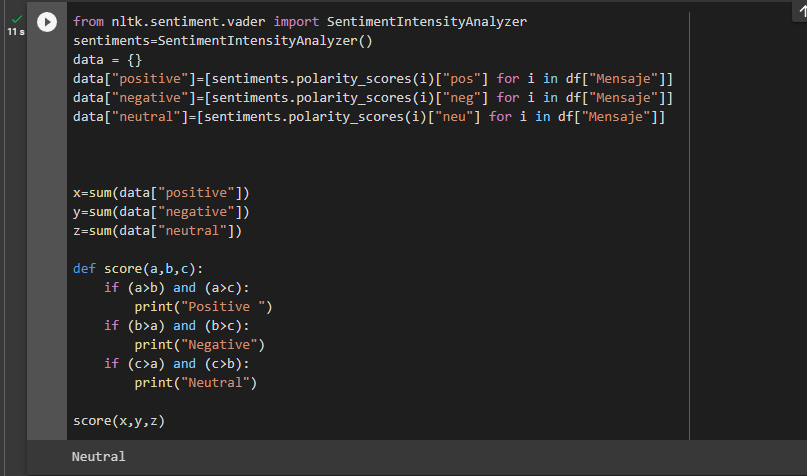

## Vamos a obtener los emojis, la multimedia y links enviados en el chat

In [16]:
def ObtenerEmojis(Mensaje):
    emoji_lista = []
    data = regex.findall(r'\X', Mensaje) # Obtener lista de caracteres de cada mensaje con una expresion regular
    for caracter in data:
           if any(c in emoji.EMOJI_DATA for c in caracter): # Obtener emojis. Se utiliza EMOJI_DATA
                #un diccionario que contiene los emojis y su traducción en diferentes lenguajes
                #la clave está en preguntar si el caracter 'c' está en el diccionario de emojis. Si si, es un emoji
                emoji_lista.append(caracter)
    return emoji_lista

# Obtener la cantidad total de mensajes
total_mensajes = df.shape[0] #shape es una funcion que regresa la dimensionalidad del dataframe
#le ponemos 0 porque solo accedemos a la columna 1 para contar todas las filas

# Obtener la cantidad de archivos multimedia enviados
multimedia_mensajes = df[df['Mensaje'] == '<Médias omis>'].shape[0] #esta es una forma de asignar un dataframe con un dataframe de base

# Obtener la cantidad de emojis enviados
df['Emojis'] = df['Mensaje'].apply(ObtenerEmojis) # Se agrega columna 'Emojis'
emojis = sum(df['Emojis'].str.len())

# Obtener la cantidad de links enviados
url_patron = r'(https?://\S+)' #se utiliza un regex para capturar que sea un link
df['URLs'] = df.Mensaje.apply(lambda x: re.findall(url_patron, x)).str.len() # Se agrega columna 'URLs'
#apply es una funcion que aplica otra función a través de un eje del dataframe
links = np.sum(df.URLs)

# Todos los datos pasarlo a diccionario
estadistica_dict = {'Tipo': ['Mensajes', 'Multimedia', 'Emojis', 'Links'],
        'Cantidad': [total_mensajes, multimedia_mensajes, emojis, links]
        }

#Convertir diccionario a dataframe
estadistica_df = pd.DataFrame(estadistica_dict, columns = ['Tipo', 'Cantidad'])

# Establecer la columna Tipo como índice
estadistica_df = estadistica_df.set_index('Tipo')
estadistica_df

,Cantidad
Tipo,
Mensajes,34496
Multimedia,1811
Emojis,8310
Links,214


## Saber cuales son los emojis más usados por ambos:
Usamos este código para generar otro dataframe con el top 10  de los emojis más usados:


In [17]:
# Obtener emojis más usados y las cantidades en el chat del grupo del dataframe
emojis_lista = list([a for b in df.Emojis for a in b])
emoji_diccionario = dict(Counter(emojis_lista))
emoji_diccionario = sorted(emoji_diccionario.items(), key=lambda x: x[1], reverse=True)

# Convertir el diccionario a dataframe
emoji_df = pd.DataFrame(emoji_diccionario, columns=['Emoji', 'Cantidad'])

# Establecer la columna Emoji como índice
emoji_df = emoji_df.set_index('Emoji')

print('Número emojis únicos usados: ', len(emoji_df), '\n')
emoji_df.head(10)

Número emojis únicos usados:  165 



,Cantidad
Emoji,
✨,1455
😔,537
😘,398
😏,304
💕,280
🥰,228
😝,227
❤️,224
🙃,217


## Cantidad de emojis enviados por Mary y el top 10

In [18]:
lista_emojis = list([a for b in df[df['Miembro']==' Mary❤️'].Emojis for a in b])
#obtiene la lista de emojis de mary
diccion_m = dict(Counter(lista_emojis)) #los cuenta en un diccionario (a cada emoji le pone el numero de veces que sale)
diccion_m = sorted(diccion_m.items(), key=lambda x: x[1], reverse=True) #ordena estos datos
#ahora debe convertirse a dataframe
mary_emoji_df = pd.DataFrame(diccion_m, columns=['Emoji', 'Cantidad'])

# Establecer la columna Emoji como índice
mary_emoji_df = mary_emoji_df.set_index('Emoji')

print('Número emojis únicos usados: ', len(mary_emoji_df), '\n')
mary_emoji_df.head(10)


Número emojis únicos usados:  136 



,Cantidad
Emoji,
✨,1381
😘,273
💕,220
😭,195
🙃,188
🤤,169
❤️,165
🫠,159
👁️,158


## Cantidad de emojis enviados por Juan y el top 10

In [19]:
lista_emojis2 = list([a for b in df[df['Miembro']==' Juan Cortes'].Emojis for a in b])
#obtiene la lista de emojis de mary
diccion_jm = dict(Counter(lista_emojis2)) #los cuenta en un diccionario (a cada emoji le pone el numero de veces que sale)
diccion_jm = sorted(diccion_jm.items(), key=lambda x: x[1], reverse=True) #ordena estos datos
#ahora debe convertirse a dataframe
jm_emoji_df = pd.DataFrame(diccion_jm, columns=['Emoji', 'Cantidad'])

# Establecer la columna Emoji como índice
jm_emoji_df = jm_emoji_df.set_index('Emoji')

print('Número emojis únicos usados: ', len(jm_emoji_df), '\n')
jm_emoji_df.head(10)

Número emojis únicos usados:  90 



,Cantidad
Emoji,
😔,392
😏,167
🥰,158
😈,138
😘,125
😝,117
👀,91
❣️,87
✨,74


## Estadisticas para Juan Y Mary (emojis, mensajes, links y multimedia)

In [20]:
# Obtener a todos los miembros
# Separar mensajes (sin multimedia) y multimedia (stickers, fotos, videos)
multimedia_df = df[df['Mensaje'] == '<Médias omis>']
mensajes_df = df.drop(multimedia_df.index)
miembros = mensajes_df.Miembro.unique()
#pandas unique: Return unique values based on a hash table. 
#con .Miembro accedemos a la columna de miembros del dataframe

# Crear diccionario donde se almacenará todos los datos
dictionario = {}

for i in range(len(miembros)):
      lista = []
  # Filtrar mensajes de un miembro en específico
      miembro_df= mensajes_df[mensajes_df['Miembro'] == miembros[i]]

  # Agregar a la lista el número total de mensajes enviados
      lista.append(miembro_df.shape[0])

  # Agregar a la lista el número de mensajes multimedia enviados
      multimedia = multimedia_df[multimedia_df['Miembro'] == miembros[i]].shape[0]
    #crea un dataframe de multimedias con el argumento de que sea igual al miembro que estamos iterando. Shape regresa el numero
      lista.append(multimedia)

  # Agregar a la lista el número total de emojis enviados
      emojis = sum(miembro_df['Emojis'].str.len())
      lista.append(emojis)

  # Agregar a la lista el número total de links enviados
      links = sum(miembro_df['URLs'])   
      lista.append(links)

  # Asignar la lista como valor a la llave del diccionario
      dictionario[miembros[i]] = lista
      print(dictionario)


{' Juan Cortes': [17386, 1236, 2526, 147]}
{' Juan Cortes': [17386, 1236, 2526, 147], ' Mary❤️': [15299, 575, 5784, 67]}


In [21]:
# Convertir de diccionario a dataframe
miembro_stats_df = pd.DataFrame.from_dict(dictionario)

# Cambiar el índice por la columna agregada 'Estadísticas'
estadísticas = ['Mensajes', 'Multimedia', 'Emojis', 'Links']
miembro_stats_df['Estadísticas'] = estadísticas
miembro_stats_df.set_index('Estadísticas', inplace=True)

# Transponer el dataframe
miembro_stats_df = miembro_stats_df.T

#Convertir a integer las columnas Mensajes, Multimedia Emojis y Links
miembro_stats_df['Mensajes'] = miembro_stats_df['Mensajes'].apply(int)
miembro_stats_df['Multimedia'] = miembro_stats_df['Multimedia'].apply(int)
miembro_stats_df['Emojis'] = miembro_stats_df['Emojis'].apply(int)
miembro_stats_df['Links'] = miembro_stats_df['Links'].apply(int)
miembro_stats_df.head(10)

Estadísticas,Mensajes,Multimedia,Emojis,Links
Juan Cortes,17386,1236,2526,147
Mary❤️,15299,575,5784,67


## Comportamiento del chat en general

Text(0, 0.5, 'Fecha')

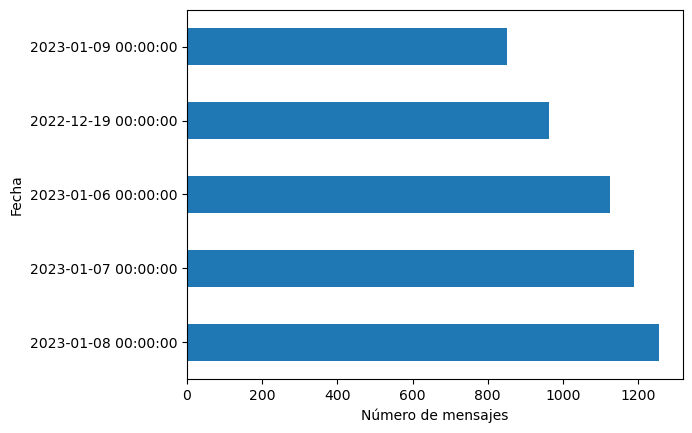

In [22]:
# Determinar los días más activos del chat
df['Fecha'].value_counts().head(5).plot.barh() #Hacer la grafica para 5 días
#value counts nos cuenta los valores que mas se repiten de la fecha
plt.xlabel('Número de mensajes')
plt.ylabel('Fecha')
    

Text(0, 0.5, 'Hora')

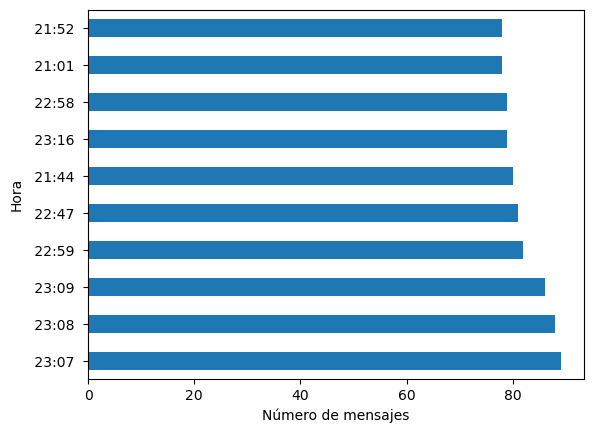

In [23]:
# Determinar las horas más activos del chat
df['Hora'].value_counts().head(10).plot.barh() #Hacer la grafica para 10 horas
#value counts nos cuenta los valores que mas se repiten de la hora
plt.xlabel('Número de mensajes')
plt.ylabel('Hora')

# Wordcloud del chat

Hay 1469243 palabras en este mensaje .


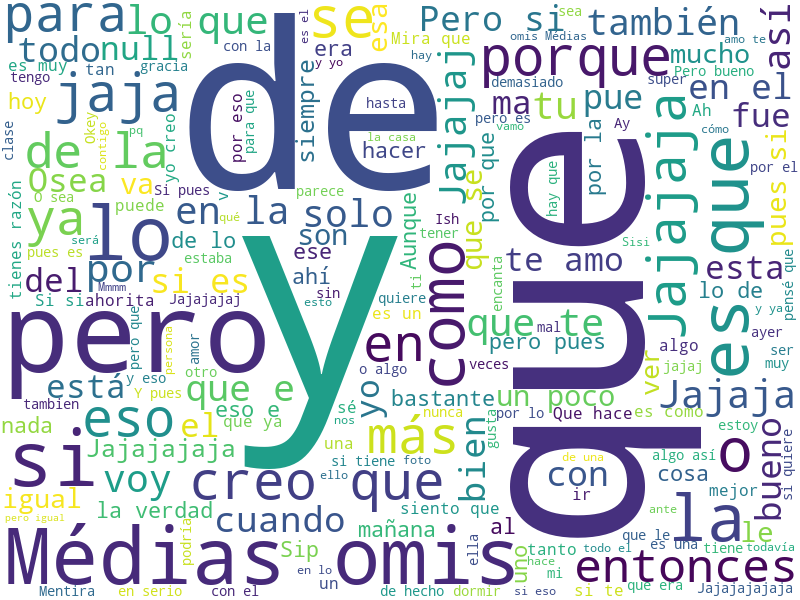

In [24]:
text = " ".join(review for review in df.Mensaje)
print ("Hay {} palabras en este mensaje .".format(len(text)))
stopwords = set(STOPWORDS)
# generar una imagen de nube

wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)
# Mostrar la foto con wordcloud:
wordcloud.to_image()


Código utilizado principalmente: https://github.com/Sandreke/WhatsApp-Group-Chat-Analysis/blob/main/WhatsApp_Group_Chat_Data_Analysis.ipynb